# Bayesian Inference

In this unit, I will discuss Bayesian posterior inference. I will
explain Bayes rule, and explain how it can be used in data applications.
Then, using data generated from a normal distribution, I will demonstrate
how to use Bayes rule to calculate a posterior distribution of the mean. Main assumptions are listed at the end.

Derived from statistical theory, Bayes rule is given by:

\begin{align*}
Pr(A|B)= & \frac{Pr(B|A)Pr(A)}{Pr(B)}
\end{align*}

$Pr(A|B)$ is called the conditional probability of $A$ given $B$.
Suppose two random events $A$ and $B$. The rule states that if event
$B$ happened, I can calculate the probability of $A$ , $Pr(A|B)$
, happening as follows: I multiply probability of $A$ happening given
that $B$ happened, $Pr(B|A)$, with the probability of event $A$
happening in general, $Pr(A)$. I divide the multiplication of both
terms by the probability of $B$ happening in general, $Pr(B)$. Bayes
rule seems abstract at first, but it can be useful if I am interested
in knowing $Pr(A|B)$, and I already have information on $Pr(A|B)$,
$Pr(A)$, and $Pr(B)$. 

Similar to the previous unit, suppose, $X=\left\{ x_{1},x_{2},x_{3},\ldots,x_{15}\right\} $,
is data of $15$ observations generated from a normal distribution
with mean $1$ and variance $1$:

\begin{align*}
X\sim & \boldsymbol{N}(\mu=1,\sigma^{2}=1)
\end{align*}

As a researcher, I am interested in knowing something about the unknown
data generating process. In the previous unit, I was interested in
hypothesis testing. I was interested in knowing if my mean
is (un)equal to a hypothesized value. Instead of testing one hypothesis, 
 I may be interested in learning something more general about possible values of $\mu$.  This can be done with Bayes rule. 
The method allows me to construct the distribution
of $\mu$ given observed data, $X$. The latter is precisely, $Pr(\mu|X)$,
and can be expressed with Bayes rule as follows:

\begin{align*}
Pr(\mu|X)= & \frac{Pr(X|\mu)Pr(\mu)}{Pr(X)}
\end{align*}

where,

$Pr(\mu|X)$ is the posterior and what Bayes rule will ultimately
answer. What is the distribution of $\mu$ given the drawn data, $X$

$Pr(\mu)$ is the prior. It is the distribution of $\mu$ independent
of any event. Here, we assume $\mu\sim\boldsymbol{N}(\mu_{0}=1,v_{0}^{2}=1)$

$Pr(X|\mu)$ what is known as the log-likelihood function goes here.
What is the probability of obtaining $X$ given a certain mean, $\mu$.

$Pr(X)$ what is the probability of obtaining $X$ for all possible
values of $\mu$. Integrated in practice over all values of $\mu$,
the term does not depend on the parameters of the models. It is a
convention to drop it for simplicity. 

\begin{align*}
Pr(\mu|X)\propto & Pr(X|\mu)Pr(\mu)
\end{align*}

For simplicity, it is known that $X$ comes from normal with unknown
$\mu$ but known $\sigma^{2}$. The above more concretely becomes,

\begin{align*}
\xi\left(\mu|X\right)\propto & f_{n}\left(X|\mu\right)\xi\left(\mu\right)
\end{align*}

where,

\begin{align*}
f_{n}\left(X|\mu\right)\propto & \exp\left(\frac{-1}{2\sigma^{2}}\sum_{i=1}^{n}\left(x_{i}-\mu\right)^{2}\right)\\
\\
\xi\left(\mu\right)\propto & \exp\left(-\frac{\left(\mu-\mu_{0}\right)^{2}}{2v_{0}^{2}}\right)
\end{align*}

Given the above, it turns out that,

\begin{align*}
\xi\left(\mu|X\right)\sim & \boldsymbol{N}(\mu_{1},v_{1}^{2})
\end{align*}

where,

\begin{align*}
\mu_{1}= & \frac{\sigma^{2}\mu_{0}+nv_{0}^{2}\bar{x}_{n}}{\sigma^{2}+nv_{0}^{2}}\\
\\
v_{1}^{2}= & \frac{\sigma^{2}v_{0}^{2}}{\sigma^{2}+nv_{0}^{2}}
\end{align*}


This can be proved by multiplying $f_{n}\left(X|\mu\right)$ and $\xi\left(\mu\right)$
then substituting in the result. The specific choice of a normal prior
makes it conjugate to the normal likelihood function. A conjugate
prior ensures a closed solution result with the same family of the
prior, namely normal. In more complex applications, a closed form
solution is not possible. With the theory on-hand, I will go ahead
and demonstrate the example numerically.


In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


n = 15  #number of observations
mu = 1 #True mean
sigmasquare = 1 #True variance
sigma = np.sqrt(sigmasquare)
prior_mu = 0 #Prior Mean
prior_variance = 1 #Prior Variance

class posterior():
    def __init__(self,obs=n): #Initialize
        #Given Variables
        self.n=obs
        self.mu=mu
        self.sigmasquare = sigmasquare
        self.sigma = sigma
        self.prior_mu=prior_mu
        self.prior_variance=prior_variance

        #Calculated Variables
        self.X=0
        self.posterior_mu=0
        self.posterior_var=0


    def random_generate(self): #Generate random data
        np.random.seed(seed=12154) #set seed
        self.X = np.random.normal(self.mu, self.sigma, self.n)
        #self.X=5
        return self.X

    def histo_graph(self):  #Plot Data to see what it look like
        plt.hist(self.X, bins=5, density=True)
        sns.kdeplot(self.X)

    def computeandgraph(self):  #Calculate Posterior parameters
        n = self.X.shape[0]
        self.posterior_mu = ((self.sigmasquare) * self.prior_mu + n * self.prior_variance * np.mean(self.X)) / (self.sigmasquare + n * self.prior_variance)
        self.posterior_var = (self.sigmasquare * self.prior_variance) / (self.sigmasquare + (n * self.prior_variance))
        postdist = norm(loc=self.posterior_mu, scale=self.posterior_var)
        x = np.linspace(0, 1.2, 1000)
        plt.plot(x, postdist.pdf(x), 'r-', alpha=0.6, label='norm pdf');
        plt.gca().axes.get_yaxis().set_visible(False);
        return (round(self.posterior_mu,3), round(self.posterior_var,3))
       



In [3]:
#Generate data from normal
Posterior_1 = posterior()
Posterior_1.random_generate()

array([-0.11976503,  1.69133541,  2.10420579,  0.99091063,  1.99561982,
       -0.77124923,  2.90362901,  0.98192434,  0.79232235, -0.25324058,
       -0.87846258, -0.76024629,  0.90918243,  2.3521696 ,  1.74099443])

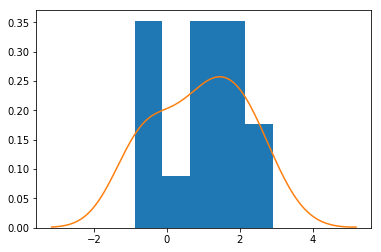

In [4]:
#Visualize the distribution of X
Posterior_1.histo_graph()

(0.855, 0.062)

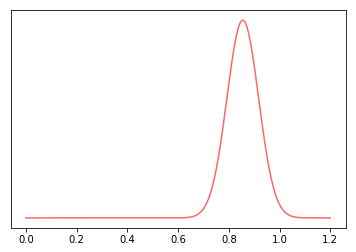

In [5]:
#Compute posterior parameters and graph for n=15
Posterior_1.computeandgraph()


(0.994, 0.003)

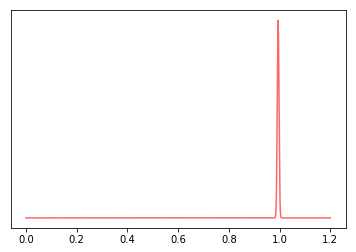

In [6]:
#Using a larger N gets distribution closer to true mean, but variance shrinks a lot
Posterior_largesample = posterior(obs=300)
Posterior_largesample.random_generate()
Posterior_largesample.computeandgraph()

### Bayesian Inference and Hypothesis Testing

The two graphs above show the posterior distribution. In other words, they show the probability of obtaining different values of $\mu$ given the data that is being observed. Similar to hypothesis testing, the posterior distribution is a statement about the population (as opposed to just the sample). The major difference between t-testing and bayesian inference is the approach. Hypothesis testing begins with a hypothesis ,theoratically outside of the model, and then uses the sample to make a statment with regards to the hypothesis (reject or fail to reject). The knowledge obtained from the hypothesis test does not go beyond the hypothesis. The bayesian approach provides a more general description of $\mu$ through the posterior distribution. It is; however, important to keep in mind drawbacks for this method as well. 

### Assumptions of Bayesian Inference

<ol>
  <li> Simplifying assumptions (can be relaxed) </li>
  <li> Choice of prior </li>
</ol> 